# Machine learning workflow:

Using the provided dataset, you are going to accomplish the task of taking it through the steps of machine learning. The steps to be looked at are stated below.

    - Data Cleansing: Clean your data appropriately
    - Data Preprocessing: Make the necessary transformations that you think are useful
    - EDA (Exploratory Data Analysis): Plot visuals to explain your investigations (all visuals should be done in seaborn library)
    - Creating Training/Validation Datasets: split your data into test and train: test data should be 25% of the total data.
    - Algorithm Selection: sample at least 8 algorithms of your own choice in this assignment and make appropriate comparisons.
    - Model Training: Train a base model from your final choice of algorithm
    - Model Testing: Test the model on your test data.
    - Communicate your findings.

In [ ]:
# IMPORTING ALL LIBRARIES NEEDED FOR THE PROJECT ALONG WITH ALGORITHMS.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno


from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyRegressor
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB

import optuna
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Algorithms
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve

from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report, plot_confusion_matrix
from pandas_profiling import ProfileReport

#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
#cf.set_config_file(offline=False, world_readable=True)


import matplotlib.pyplot as plt

%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import missingno as msno
import warnings
warnings.simplefilter(action ="ignore")
import warnings
warnings.filterwarnings("ignore")

In [2]:
#pd.set_option('max_columns',100)
#pd.set_option('max_rows',900)

#pd.set_option('max_colwidth',200)

df = pd.read_excel(r'imputed_data.xlsx')
df = df[df['D21 IUPM']<10]
df = df.reset_index(drop=True)
df.head()

,Participant ID,Time on ART (days),cd4/cd8_ratio,Female,Male,gp41,pol,D21 IUPM
0,101_0,2652,0.985043,1,0,7.641235,12.012563,0.083383
1,101_2,3385,1.314554,1,0,7.641235,12.012563,0.071460
2,101_5,4490,1.589510,1,0,7.641235,12.012563,0.148422
3,102_2,3402,0.602740,0,1,3.434041,11.599675,2.197225
4,102_5,4508,0.737534,0,1,3.434041,11.599675,0.321015


## EXPLORATORY DATA ANALYSIS

In [3]:
# returning descriptive statistics for only numeric values not for categorical values. The describe() method summarizes the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time on ART (days),211.0,3362.710900,1096.320685,794.000000,2630.000000,3370.000000,4013.500000,5603.000000
cd4/cd8_ratio,211.0,0.896516,0.325351,0.329536,0.644561,0.830261,1.125684,2.058824
Female,211.0,0.654028,0.476815,0.000000,0.000000,1.000000,1.000000,1.000000
Male,211.0,0.345972,0.476815,0.000000,0.000000,0.000000,1.000000,1.000000
gp41,211.0,0.444057,1.018820,0.090140,0.116628,0.167464,0.445202,7.641235
pol,211.0,12.234322,1.025254,7.829307,11.922190,12.292621,12.490888,18.121016
D21 IUPM,211.0,1.336984,2.055549,0.037041,0.145129,0.509139,1.421421,9.175619


In [4]:
# understanding the datAa imported by looking at data types for columns and column names.This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage with the inclusion of verbose = true.
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Participant ID      211 non-null    object 
 1   Time on ART (days)  211 non-null    int64  
 2   cd4/cd8_ratio       211 non-null    float64
 3   Female              211 non-null    int64  
 4   Male                211 non-null    int64  
 5   gp41                211 non-null    float64
 6   pol                 211 non-null    float64
 7   D21 IUPM            211 non-null    float64
dtypes: float64(4), int64(3), object(1)
memory usage: 13.3+ KB


In [5]:
# viewing the dimensions of the data frame
print(f"The dataset size: {df.shape}")

The dataset size: (211, 8)


In [6]:
df = df[['Time on ART (days)', 'cd4/cd8_ratio', 'Male','Female','gp41','pol','D21 IUPM']]

### FINDING DUPLICATES IN THE DATA.

In [7]:
# finding duplicate values in the data frame
df.duplicated().sum

<bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
206    False
207    False
208    False
209    False
210    False
Length: 211, dtype: bool>

In [8]:
# succinct way of knowing how many duplicates we have which is 0 hence no duplicates.
df.duplicated().sum()

0

In [9]:
df.values

array([[2.65200000e+03, 9.85042735e-01, 0.00000000e+00, ...,
        7.64123518e+00, 1.20125627e+01, 8.33830000e-02],
       [3.38500000e+03, 1.31455399e+00, 0.00000000e+00, ...,
        7.64123518e+00, 1.20125627e+01, 7.14600000e-02],
       [4.49000000e+03, 1.58950969e+00, 0.00000000e+00, ...,
        7.64123518e+00, 1.20125627e+01, 1.48422000e-01],
       ...,
       [3.37000000e+03, 8.61359571e-01, 0.00000000e+00, ...,
        1.16654778e-01, 1.24420331e+01, 1.32130200e+00],
       [3.37000000e+03, 8.60302678e-01, 0.00000000e+00, ...,
        7.23234706e-01, 1.21266885e+01, 4.22863000e-01],
       [3.37000000e+03, 6.27071823e-01, 1.00000000e+00, ...,
        1.83392105e-01, 1.25371681e+01, 3.22778000e-01]])

In [10]:
profile = ProfileReport(df, title='Test', explorative=True)

In [11]:
#profile

In [12]:
df

,Time on ART (days),cd4/cd8_ratio,Male,Female,gp41,pol,D21 IUPM
0,2652,0.985043,0,1,7.641235,12.012563,0.083383
1,3385,1.314554,0,1,7.641235,12.012563,0.071460
2,4490,1.589510,0,1,7.641235,12.012563,0.148422
3,3402,0.602740,1,0,3.434041,11.599675,2.197225
4,4508,0.737534,1,0,3.434041,11.599675,0.321015
...,...,...,...,...,...,...,...
206,3370,1.364679,1,0,0.117485,12.388218,0.788492
207,3370,0.473812,0,1,0.199861,11.935658,0.134433
208,3370,0.861360,0,1,0.116655,12.442033,1.321302
209,3370,0.860303,0,1,0.723235,12.126688,0.422863


### FINDING MISSING VALUES.

In [13]:
# check missing values by returning boolean for either missing or non-missing
pd.isnull(df)

,Time on ART (days),cd4/cd8_ratio,Male,Female,gp41,pol,D21 IUPM
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
206,False,False,False,False,False,False,False
207,False,False,False,False,False,False,False
208,False,False,False,False,False,False,False
209,False,False,False,False,False,False,False


In [14]:
df

,Time on ART (days),cd4/cd8_ratio,Male,Female,gp41,pol,D21 IUPM
0,2652,0.985043,0,1,7.641235,12.012563,0.083383
1,3385,1.314554,0,1,7.641235,12.012563,0.071460
2,4490,1.589510,0,1,7.641235,12.012563,0.148422
3,3402,0.602740,1,0,3.434041,11.599675,2.197225
4,4508,0.737534,1,0,3.434041,11.599675,0.321015
...,...,...,...,...,...,...,...
206,3370,1.364679,1,0,0.117485,12.388218,0.788492
207,3370,0.473812,0,1,0.199861,11.935658,0.134433
208,3370,0.861360,0,1,0.116655,12.442033,1.321302
209,3370,0.860303,0,1,0.723235,12.126688,0.422863


In [15]:
# succinct way to check missing values by summation
pd.isnull(df).sum()

Time on ART (days)    0
cd4/cd8_ratio         0
Male                  0
Female                0
gp41                  0
pol                   0
D21 IUPM              0
dtype: int64

In [16]:
# Count the missing and null values for dataset.
miss_values = df.columns[df.isnull().any()]
print(f"Missing values:\n{df[miss_values].isnull().sum()}")

null_values = df.columns[df.isna().any()]
print(f"Null values:\n{df[null_values].isna().sum()}")

Missing values:
Series([], dtype: float64)
Null values:
Series([], dtype: float64)


In [17]:
# identifying numerical and categorical columns to know which columns will be required for computational reasons.

numerical= df.select_dtypes('number').columns
categorical = df.select_dtypes('object').columns
print(f'Numerical Columns:  {df[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['Time on ART (days)', 'cd4/cd8_ratio', 'Male', 'Female', 'gp41', 'pol',
       'D21 IUPM'],
      dtype='object')


Categorical Columns: Index([], dtype='object')


In [18]:
# finding dispersion from 0, which would implicate abnormal data if variance is high
df[categorical].nunique()
# there is no high variance and no zero variance , hence our data is normal

Series([], dtype: float64)

In [19]:
df

,Time on ART (days),cd4/cd8_ratio,Male,Female,gp41,pol,D21 IUPM
0,2652,0.985043,0,1,7.641235,12.012563,0.083383
1,3385,1.314554,0,1,7.641235,12.012563,0.071460
2,4490,1.589510,0,1,7.641235,12.012563,0.148422
3,3402,0.602740,1,0,3.434041,11.599675,2.197225
4,4508,0.737534,1,0,3.434041,11.599675,0.321015
...,...,...,...,...,...,...,...
206,3370,1.364679,1,0,0.117485,12.388218,0.788492
207,3370,0.473812,0,1,0.199861,11.935658,0.134433
208,3370,0.861360,0,1,0.116655,12.442033,1.321302
209,3370,0.860303,0,1,0.723235,12.126688,0.422863


In [20]:
import seaborn as sns

<AxesSubplot:>

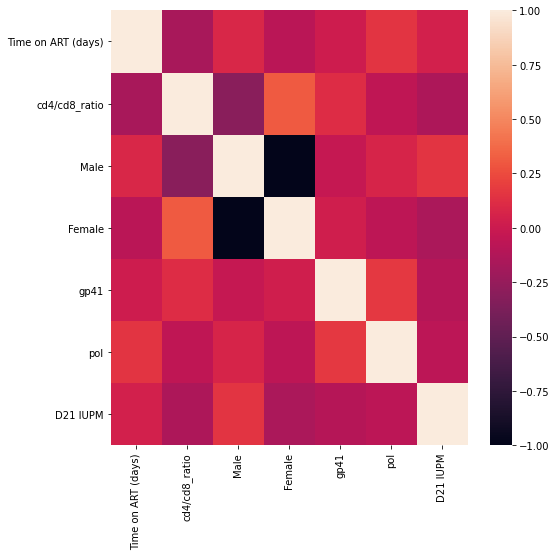

In [21]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(method='pearson'))

Text(0.5, 1.0, 'Data correlation matrix')

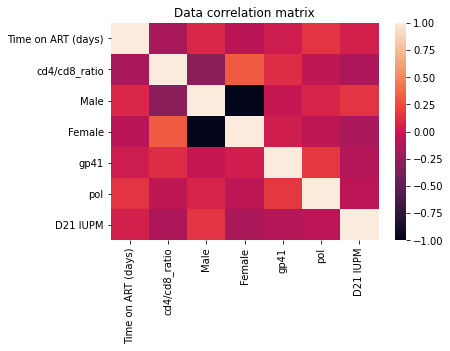

In [22]:
ax=sns.heatmap(df.corr(method='pearson'))
ax.set_title('Data correlation matrix')

In [23]:
# finding descriptive statistics for the numerical variables
df[numerical].describe()

,Time on ART (days),cd4/cd8_ratio,Male,Female,gp41,pol,D21 IUPM
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,3362.710900,0.896516,0.345972,0.654028,0.444057,12.234322,1.336984
std,1096.320685,0.325351,0.476815,0.476815,1.018820,1.025254,2.055549
min,794.000000,0.329536,0.000000,0.000000,0.090140,7.829307,0.037041
25%,2630.000000,0.644561,0.000000,0.000000,0.116628,11.922190,0.145129
50%,3370.000000,0.830261,0.000000,1.000000,0.167464,12.292621,0.509139
75%,4013.500000,1.125684,1.000000,1.000000,0.445202,12.490888,1.421421
max,5603.000000,2.058824,1.000000,1.000000,7.641235,18.121016,9.175619


In [24]:
# identifying correlation between variables, negatives are negative correlation, + are positive corelation, >0 is highly corrrelated ccolumns , we need to watch out for these.
numerical1= df.select_dtypes('number').columns
df[numerical1].corr()

,Time on ART (days),cd4/cd8_ratio,Male,Female,gp41,pol,D21 IUPM
Time on ART (days),1.000000,-0.168647,0.081339,-0.081339,0.014101,0.153069,0.045280
cd4/cd8_ratio,-0.168647,1.000000,-0.305814,0.305814,0.112374,-0.055926,-0.141311
Male,0.081339,-0.305814,1.000000,-1.000000,-0.025642,0.062868,0.149879
Female,-0.081339,0.305814,-1.000000,1.000000,0.025642,-0.062868,-0.149879
gp41,0.014101,0.112374,-0.025642,0.025642,1.000000,0.165200,-0.102720
pol,0.153069,-0.055926,0.062868,-0.062868,0.165200,1.000000,-0.071825
D21 IUPM,0.045280,-0.141311,0.149879,-0.149879,-0.102720,-0.071825,1.000000


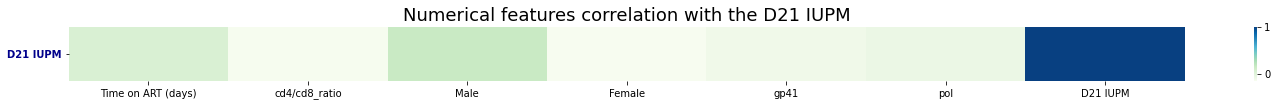

In [25]:
# Visualizing correlations with the Target Heart Disease.
import matplotlib.pyplot as plt
numeric_data = df.select_dtypes(exclude="object")
numeric_corr = numeric_data.corr()
f,ax=plt.subplots(figsize=(25,1))
sns.heatmap(numeric_corr.sort_values(by=["D21 IUPM"], ascending=False).head(1), cmap="GnBu")
plt.title("Numerical features correlation with the D21 IUPM", fontsize=18) #weight="bold", color="#5F9EA7")
plt.yticks(weight="bold", color="darkblue", rotation=0)

plt.show()

In [26]:
f.savefig("images/num_corr.svg",bbox_inches="tight")

In [27]:
Num_feature = numeric_corr["D21 IUPM"].sort_values(ascending=False).head(20).to_frame()

cm = sns.light_palette("#5F9EA0", as_cmap=True)

style = Num_feature.style.background_gradient(cmap=cm)
style

,D21 IUPM
D21 IUPM,1.000000
Male,0.149879
Time on ART (days),0.045280
pol,-0.071825
gp41,-0.102720
cd4/cd8_ratio,-0.141311
Female,-0.149879


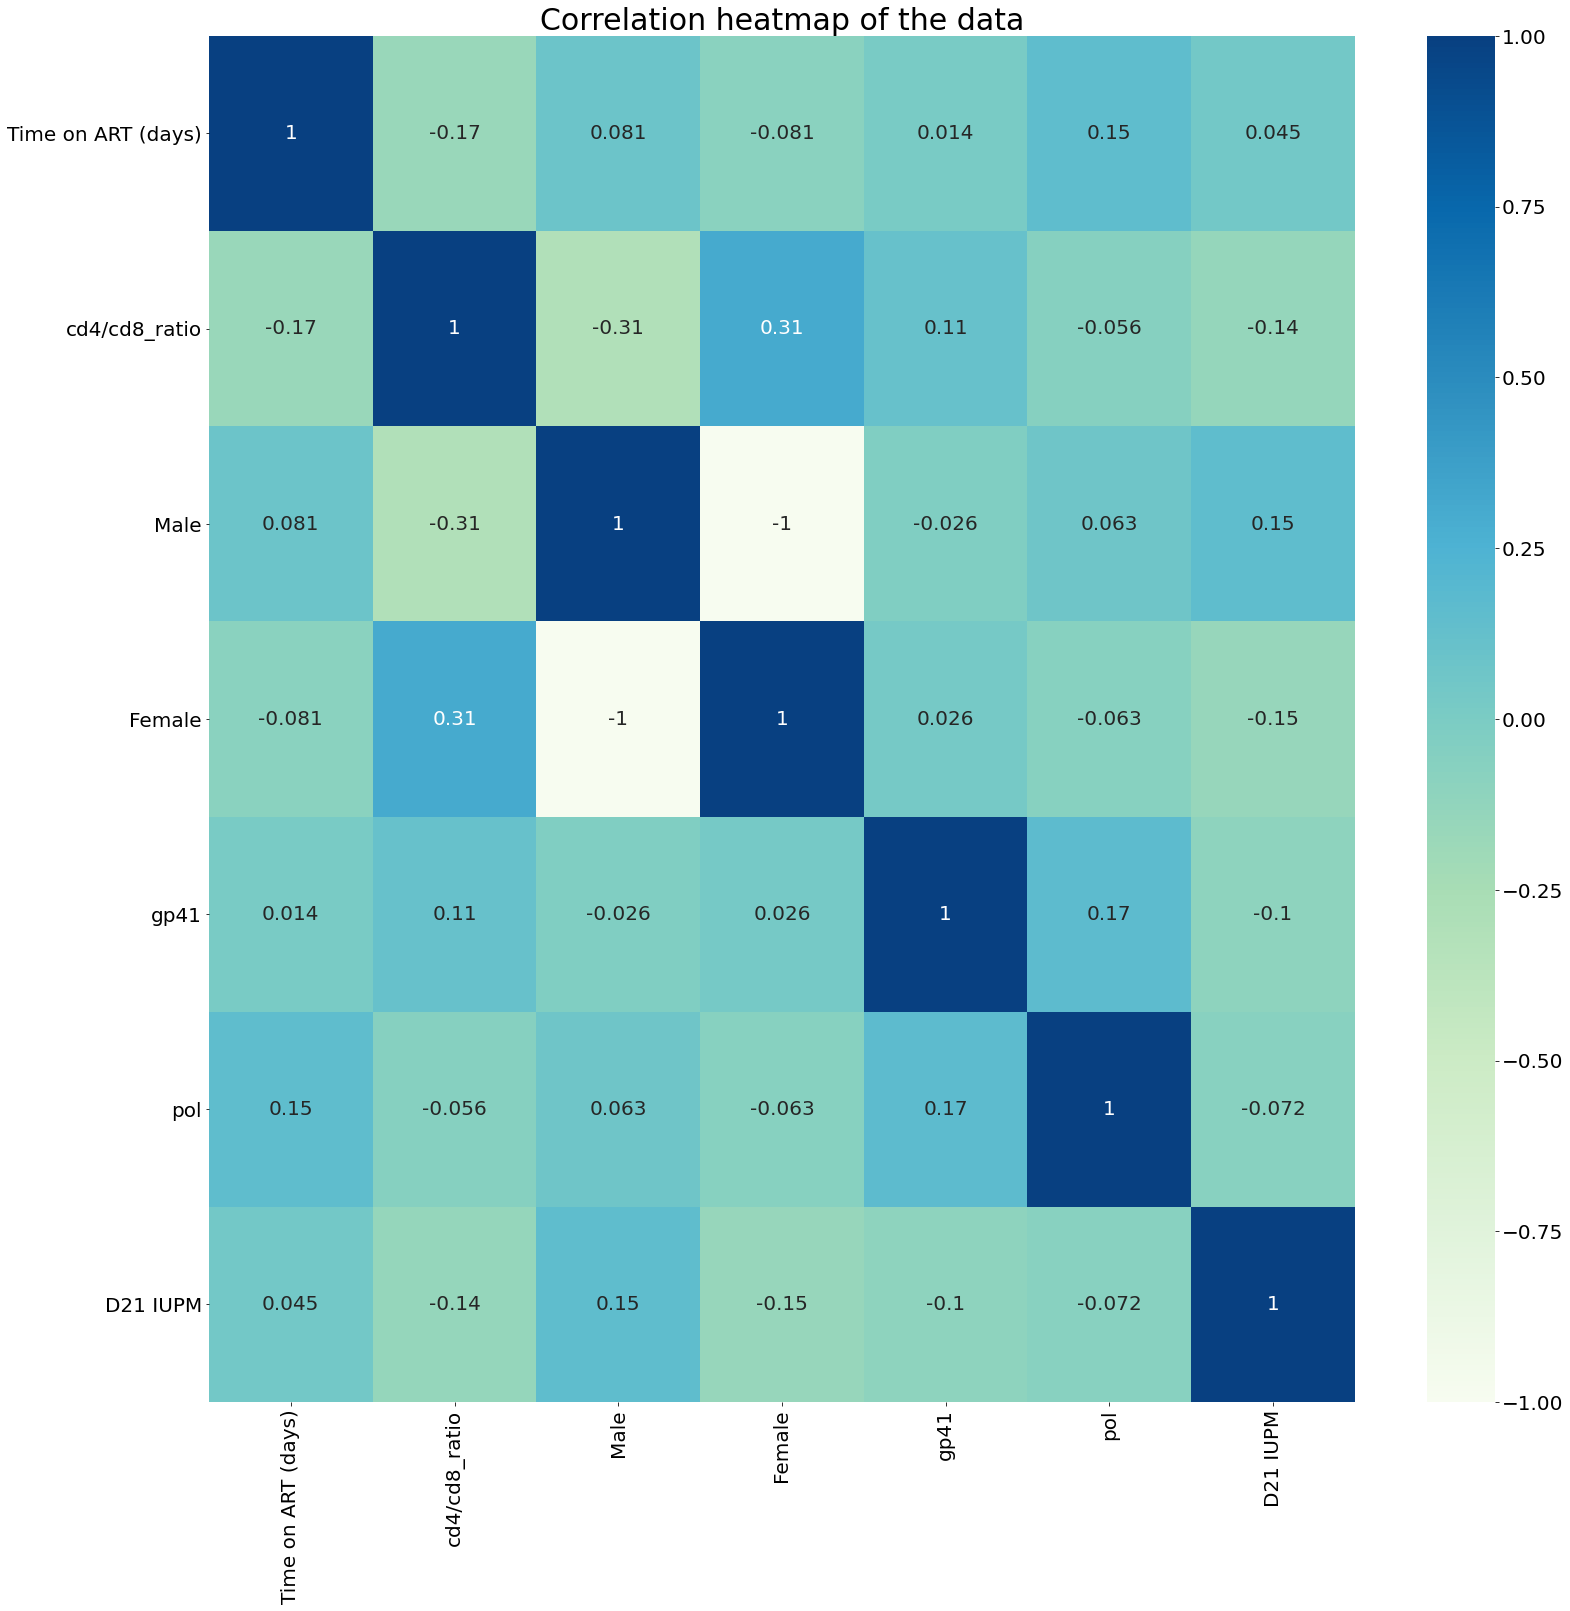

In [28]:
# Set the size of figure to 12 by 10.
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(23,23))

# Seaborn has very simple solution for heatmap
p=sns.heatmap(df.corr(), annot=True, cmap = "GnBu")
plt.title("Correlation heatmap of the data", fontsize=30)
## reduce space above plot
plt.subplots_adjust(top=0.95, right=0.99)
## save plot
plt.savefig("images/heatmap.svg")

<AxesSubplot:>

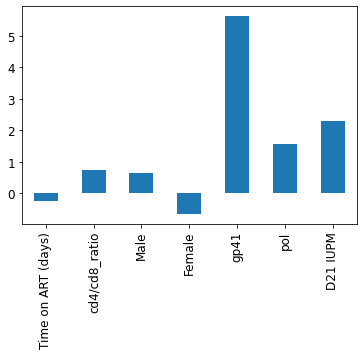

In [29]:
from scipy.stats.stats import pearsonr
print('Time on ART (days)', pearsonr(df['Time on ART (days)'], df['D21 IUPM']))
print('cd4/cd8_ratio', pearsonr(df['cd4/cd8_ratio'], df['D21 IUPM']))
print('Female', pearsonr(df['Female'], df['D21 IUPM']))
print('Male', pearsonr(df['Male'], df['D21 IUPM']))
print('gp41', pearsonr(df['gp41'], df['D21 IUPM']))
print('pol', pearsonr(df['pol'], df['D21 IUPM']))
plt.rcParams.update({'font.size': 12})

#df.skew().plot(kind='bar')

In [30]:
df

,Time on ART (days),cd4/cd8_ratio,Male,Female,gp41,pol,D21 IUPM
0,2652,0.985043,0,1,7.641235,12.012563,0.083383
1,3385,1.314554,0,1,7.641235,12.012563,0.071460
2,4490,1.589510,0,1,7.641235,12.012563,0.148422
3,3402,0.602740,1,0,3.434041,11.599675,2.197225
4,4508,0.737534,1,0,3.434041,11.599675,0.321015
...,...,...,...,...,...,...,...
206,3370,1.364679,1,0,0.117485,12.388218,0.788492
207,3370,0.473812,0,1,0.199861,11.935658,0.134433
208,3370,0.861360,0,1,0.116655,12.442033,1.321302
209,3370,0.860303,0,1,0.723235,12.126688,0.422863


In [31]:
## split the data into train and test...expose test set to smogn
np.random.seed(7)
df_train = df.sample(frac = 0.8).reset_index()
df_test = df.drop(df_train.index).reset_index()
print("test",df_test.head(),df_test.shape)
print("train",df_train.head(), df_train.shape)

test    index  Time on ART (days)  cd4/cd8_ratio  Male  Female      gp41  \
0    169                2541       1.276850     0       1  0.102679   
1    170                3244       1.131902     0       1  0.102679   
2    171                3989       1.597315     0       1  0.102679   
3    172                2903       0.459980     0       1  0.120912   
4    173                3608       0.536953     0       1  0.120912   

         pol  D21 IUPM  
0  11.145228  0.069715  
1  11.145228  0.047804  
2  11.145228  0.112344  
3  12.112587  0.273810  
4  12.112587  0.071460   (42, 8)
train    index  Time on ART (days)  cd4/cd8_ratio  Male  Female      gp41  \
0     78                1014       0.632302     1       0  0.123285   
1     65                3233       0.552593     1       0  0.146617   
2     94                2846       0.764706     0       1  0.445202   
3     22                3645       0.428681     1       0  0.198202   
4     63                3889       0.630435     0

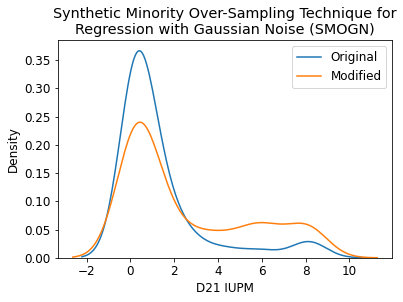

In [32]:
### smogn test
## synthetic Minority Over-Sampling Technique for Regression with Gaussian Noise in python 
from textwrap import wrap
np.random.seed(42)

import smogn
rg_mtrx = [
    [0.5, 0, 0],
    [1.5, 0, 0],
    [2.5, 0, 0],
    [3.5, 1, 0],
    [4.5, 1, 0],
    [5.5, 1, 0],
    [6.5, 1, 0],
    [7.5, 1, 0],
    [8.5, 1, 0],
    [9.5, 1, 0]
]
##dfs = df_train.reset_index()[['Time on ART (days)', 'cd4/cd8_ratio', 'Male','Female','gp41','pol','D21 IUPM']]
#52#df_smogn = smogn.smoter(data=dfs, y="D21 IUPM", k=7,samp_method='extreme', rel_method = "manual", rel_thres=0.6,
##                       drop_na_col=True, drop_na_row=True, replace=False,rel_ctrl_pts_rg=rg_mtrx)

#df_smogn = smogn.smoter(data=dfs, y="D21 IUPM", k=7,samp_method='extreme', rel_method = "auto", rel_thres=0.2,
  #                     drop_na_col=True, drop_na_row=True, replace=False)

## k- number of neighbours to consider. Default is 5
## samp_method = 'extreme' to aggressively over/under-sample
df_smogn = pd.read_csv(r'/home/kiberu/Desktop/simulation/New folder/ML/df_smogn52.csv')
## plot y distribution
sns.kdeplot(df_train['D21 IUPM'], label="Original")
sns.kdeplot(df_smogn['D21 IUPM'], label="Modified")
plt.legend()
plt.title("Synthetic Minority Over-Sampling Technique for" +"\n"+ "Regression with Gaussian Noise (SMOGN)")
plt.savefig("images/smogn.svg")

In [33]:
df_smogn = pd.read_csv(r'/home/kiberu/Desktop/simulation/New folder/ML/df_smogn52.csv')

# Scaling Data

In [34]:
df_smogn.dtypes

Time on ART (days)      int64
cd4/cd8_ratio         float64
Male                    int64
Female                  int64
gp41                  float64
pol                   float64
D21 IUPM              float64
dtype: object

In [35]:
df_smogn.describe()

,Time on ART (days),cd4/cd8_ratio,Male,Female,gp41,pol,D21 IUPM
count,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000
mean,3487.101124,0.846499,0.376404,0.497191,0.307358,12.227592,2.573595
std,1061.236951,0.305179,0.485165,0.500696,0.670642,0.752443,2.875459
min,782.000000,0.324740,0.000000,0.000000,0.090140,7.829307,0.037041
25%,3168.500000,0.622225,0.000000,0.000000,0.117607,11.930028,0.200676
50%,3397.500000,0.820231,0.000000,0.000000,0.145813,12.292621,1.073948
75%,3998.750000,1.050313,1.000000,1.000000,0.321868,12.515216,5.050233
max,5625.000000,2.058824,1.000000,1.000000,7.641235,18.121016,8.598313


In [36]:
## input data
from sklearn.preprocessing import StandardScaler
scale_X = StandardScaler()
Xtn =  pd.DataFrame(scale_X.fit_transform(df_smogn[["Time on ART (days)","cd4/cd8_ratio","Male","Female","gp41","pol"]]))
X_train = Xtn.values
print("Train", X_train)
print(len(X_train))

Xtst =  pd.DataFrame(scale_X.fit_transform(df_test[["Time on ART (days)","cd4/cd8_ratio","Male","Female","gp41","pol"]]))
X_test = Xtst.values
print("Test",X_test)
print(len(X_test))

Train [[ 1.77674645e+00  1.29911191e+00 -7.76919303e-01  1.00563385e+00
   2.20276345e-02 -1.20884749e+00]
 [ 1.84185643e+00  9.61395204e-01 -7.76919303e-01  1.00563385e+00
  -1.45356676e-01 -6.99295538e-01]
 [ 1.71824183e+00  1.02069139e+00 -7.76919303e-01 -9.94397715e-01
   3.99977036e-04 -9.73423358e-01]
 ...
 [-1.10499299e-01  1.28981044e+00 -7.76919303e-01  1.00563385e+00
  -1.47464301e-01  5.74032652e-01]
 [-1.10499299e-01  4.40711838e-01 -7.76919303e-01  1.00563385e+00
  -1.30801710e-01  8.49183784e-01]
 [-6.03070438e-01 -6.21981059e-02 -7.76919303e-01  1.00563385e+00
  -1.62982774e-01 -4.53077344e-01]]
356
Test [[-1.00675641  0.84670157 -0.55901699  0.55901699 -0.4297713  -0.85317099]
 [-0.06231053  0.41540845 -0.55901699  0.55901699 -0.4297713  -0.85317099]
 [ 0.93856029  1.8002496  -0.55901699  0.55901699 -0.4297713  -0.85317099]
 [-0.52042723 -1.5839001  -0.55901699  0.55901699 -0.40373202 -0.25695588]
 [ 0.42670555 -1.35486493 -0.55901699  0.55901699 -0.40373202 -0.25695588

In [37]:
## target data
y_train = df_smogn["D21 IUPM"]

y_test = df_test["D21 IUPM"]
print(y_test)

0     0.069715
1     0.047804
2     0.112344
3     0.273810
4     0.071460
5     0.275712
6     0.211310
7     1.993832
8     0.758925
9     0.617012
10    0.071460
11    0.074108
12    0.471889
13    1.321302
14    0.047804
15    3.283304
16    6.101929
17    2.259090
18    0.512590
19    2.629122
20    4.473311
21    0.066015
22    1.100471
23    0.047804
24    2.629122
25    1.098643
26    8.179554
27    0.071460
28    1.993832
29    4.473311
30    1.757911
31    0.047804
32    1.100471
33    0.047804
34    6.101929
35    1.313631
36    5.781360
37    0.788492
38    0.134433
39    1.321302
40    0.422863
41    0.322778
Name: D21 IUPM, dtype: float64


## SELECTING A MODEL

### Test Train Split and Cross Validation methods

In [38]:
X_train

array([[ 1.77674645e+00,  1.29911191e+00, -7.76919303e-01,
         1.00563385e+00,  2.20276345e-02, -1.20884749e+00],
       [ 1.84185643e+00,  9.61395204e-01, -7.76919303e-01,
         1.00563385e+00, -1.45356676e-01, -6.99295538e-01],
       [ 1.71824183e+00,  1.02069139e+00, -7.76919303e-01,
        -9.94397715e-01,  3.99977036e-04, -9.73423358e-01],
       ...,
       [-1.10499299e-01,  1.28981044e+00, -7.76919303e-01,
         1.00563385e+00, -1.47464301e-01,  5.74032652e-01],
       [-1.10499299e-01,  4.40711838e-01, -7.76919303e-01,
         1.00563385e+00, -1.30801710e-01,  8.49183784e-01],
       [-6.03070438e-01, -6.21981059e-02, -7.76919303e-01,
         1.00563385e+00, -1.62982774e-01, -4.53077344e-01]])

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((356, 6), (42, 6), (356,), (42,))

In [40]:
X = np.concatenate((X_train, X_test))
X.shape

(398, 6)

In [41]:
y = np.concatenate((y_train, y_test))
y.shape

(398,)

## Linear Regression

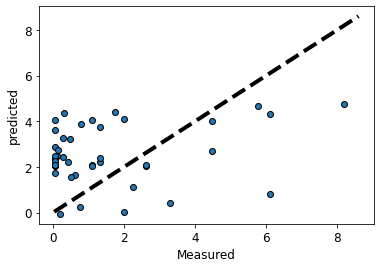

r2:  -0.3679357226302409 MAE:  2.0746041892099862 RMSE:  2.339446542442344


In [42]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# model
lr = linear_model.LinearRegression()
# train model
lr.fit(X_train, y_train)

# visualize
lr_pred = lr.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, lr_pred, edgecolors=(0,0,0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("predicted")
plt.show()

# get metrics
print("r2: ", r2_score(y_test, lr_pred), "MAE: ", mean_absolute_error(y_test, lr_pred), "RMSE: ", sqrt(mean_squared_error(y_test, lr_pred)))

<AxesSubplot:xlabel='D21 IUPM', ylabel='Density'>

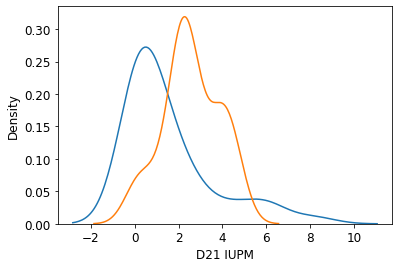

In [43]:
## plot
sns.kdeplot(y_test, label="Original")
sns.kdeplot(lr_pred, label="Predicted")

## K-Nearest Neighbours

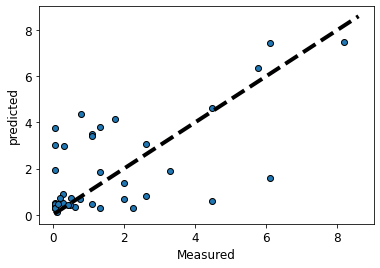

r2:  0.27599197962383715 MAE:  1.19416231142386


In [44]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# model
KNN = KNeighborsRegressor()
# train model
KNN.fit(X_train, y_train)

# visualize
KNN_pred = KNN.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, KNN_pred, edgecolors=(0,0,0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("predicted")
plt.show()

# get metrics
print("r2: ", r2_score(y_test, KNN_pred), "MAE: ", mean_absolute_error(y_test, KNN_pred))

## Decisison Trees

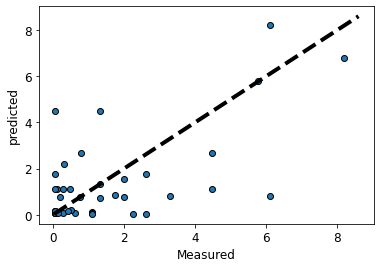

r2:  0.30494278779736295 MAE:  1.123847456844283


In [45]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# model
dt = DecisionTreeRegressor(random_state=9)
# train model
dt.fit(X_train, y_train)

# visualize
dt_pred = dt.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, dt_pred, edgecolors=(0,0,0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("predicted")
plt.show()

# get metrics
print("r2: ", r2_score(y_test, dt_pred), "MAE: ", mean_absolute_error(y_test, dt_pred))

## Extra Trees Regressor 

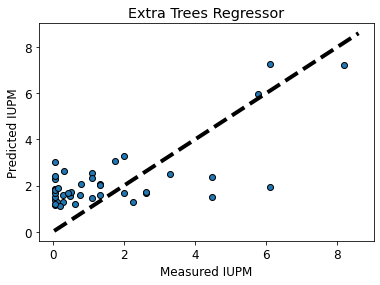

r2:  0.38792953163103705 MAE:  1.3591915560294427 RMSE:  1.5648798311880174


In [46]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# model
et = ExtraTreesRegressor(random_state=42)
# train model
et.fit(X_train, y_train)

# visualize
et_pred = et.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, et_pred, edgecolors=(0,0,0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured IUPM")
ax.set_ylabel("Predicted IUPM")
plt.title("Extra Trees Regressor")
plt.show()

# get metrics
print("r2: ", r2_score(y_test, et_pred), "MAE: ", mean_absolute_error(y_test, et_pred), "RMSE: ", sqrt(mean_squared_error(y_test, et_pred)))

In [47]:
fig.savefig("images/et.svg")

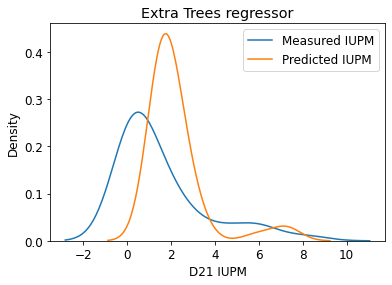

In [48]:
## plot
sns.kdeplot(y_test, label="Measured IUPM")
sns.kdeplot(et_pred, label="Predicted IUPM")
plt.title("Extra Trees regressor")
plt.legend()
plt.savefig("images/et_pred.svg")

## Random Forest Regressor

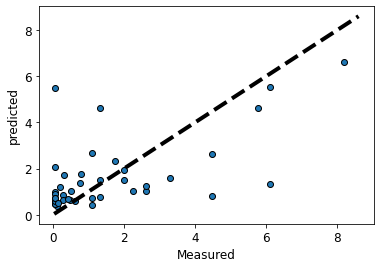

r2:  0.34734253361985234 MAE:  1.1087422888202918


In [49]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# model
rf = RandomForestRegressor(random_state=2)
# train model
rf.fit(X_train, y_train)

# visualize
rf_pred = rf.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, rf_pred, edgecolors=(0,0,0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("predicted")
plt.show()

# get metrics
print("r2: ", r2_score(y_test, rf_pred), "MAE: ", mean_absolute_error(y_test, rf_pred))

## Support Vector Machine

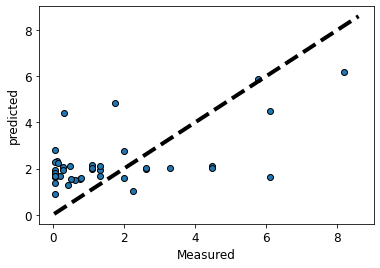

r2:  0.21138612007281543 MAE:  1.526670499552356


In [50]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# model
svr = SVR()
# train model
svr.fit(X_train, y_train)

# visualize
svr_pred = svr.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, svr_pred, edgecolors=(0,0,0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("predicted")
plt.show()

# get metrics
print("r2: ", r2_score(y_test, svr_pred), "MAE: ", mean_absolute_error(y_test, svr_pred))

## Gradient Boosting Regressor

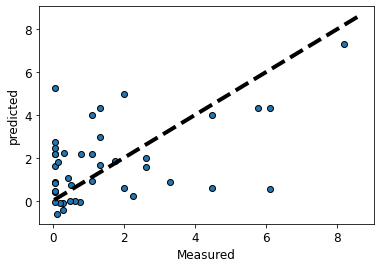

r2:  0.045494885083214975 MAE:  1.483901390393341


In [51]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# model
GB = GradientBoostingRegressor(random_state=8)
# train model
GB.fit(X_train, y_train)

# visualize
GB_pred = GB.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, GB_pred, edgecolors=(0,0,0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("predicted")
plt.show()

# get metrics
print("r2: ", r2_score(y_test, GB_pred), "MAE: ", mean_absolute_error(y_test, GB_pred))

### XGB Regressor

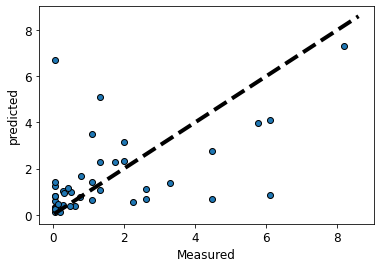

r2:  0.16161311764079933 MAE:  1.1803089545034908


In [52]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# model
XGB = XGBRegressor()
# train model
XGB.fit(X_train, y_train)

# visualize
XGB_pred = XGB.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, XGB_pred, edgecolors=(0,0,0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("predicted")
plt.show()

# get metrics
print("r2: ", r2_score(y_test, XGB_pred), "MAE: ", mean_absolute_error(y_test, XGB_pred))

## LGBM Regressor

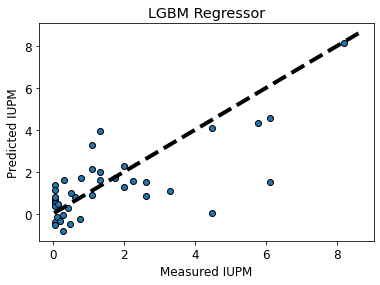

r2:  0.5200123195541209 MAE:  0.9683292122240774 RMSE:  1.3857833073470618


In [53]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# model
LGBM = LGBMRegressor(random_state=1)
# train model
LGBM.fit(X_train, y_train)

# visualize
LGBM_pred = LGBM.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, LGBM_pred, edgecolors=(0,0,0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured IUPM")
ax.set_ylabel("Predicted IUPM")
plt.title("LGBM Regressor")
plt.show()

# get metrics
print("r2: ", r2_score(y_test, LGBM_pred), "MAE: ", mean_absolute_error(y_test, LGBM_pred), "RMSE: ", sqrt(mean_squared_error(y_test, LGBM_pred)))

In [54]:
fig.savefig("images/lgbm.svg")

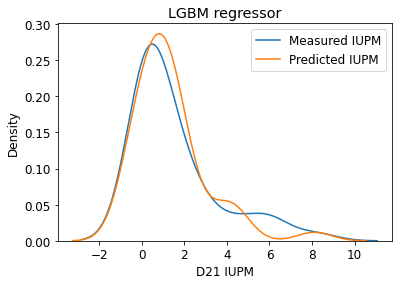

In [55]:
## plot
sns.kdeplot(y_test, label="Measured IUPM")
sns.kdeplot(LGBM_pred, label="Predicted IUPM")
plt.title("LGBM regressor")
plt.legend()
plt.savefig("images/LGBM_pred.svg")

## AdaBoost Regressor

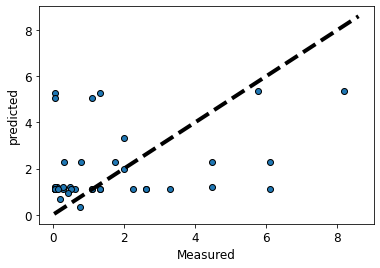

r2:  -0.07900688052217508 MAE:  1.5335318684118537


In [56]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# model
Ada = AdaBoostRegressor()
# train model
Ada.fit(X_train, y_train)

# visualize
Ada_pred = Ada.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, Ada_pred, edgecolors=(0,0,0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("predicted")
plt.show()

# get metrics
print("r2: ", r2_score(y_test, Ada_pred), "MAE: ", mean_absolute_error(y_test, Ada_pred))

## CatBoost Regressor

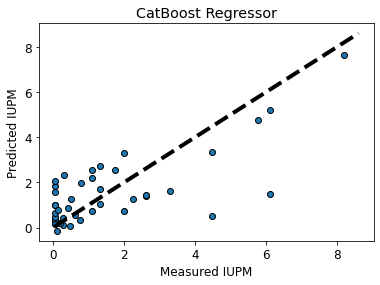

r2:  0.5477817724283338 MAE:  0.9799985958789398 RMSE:  1.3450991927120917


In [57]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# model
cb = CatBoostRegressor(learning_rate=0.017,verbose=0, random_state=4)
# train model
cb.fit(X_train, y_train)

# visualize
cb_pred = cb.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, cb_pred, edgecolors=(0,0,0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured IUPM")
ax.set_ylabel("Predicted IUPM")
plt.title("CatBoost Regressor")
plt.show()

# get metrics
print("r2: ", r2_score(y_test, cb_pred), "MAE: ", mean_absolute_error(y_test, cb_pred), "RMSE: ", sqrt(mean_squared_error(y_test, cb_pred)))

In [58]:
fig.savefig("images/cat.svg")

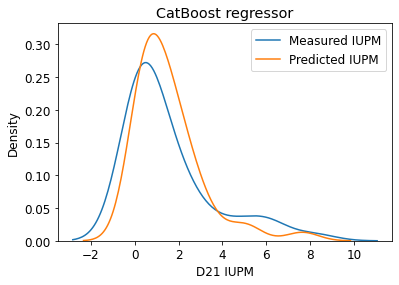

In [59]:
## plot
sns.kdeplot(y_test, label="Measured IUPM")
sns.kdeplot(cb_pred, label="Predicted IUPM")
plt.title("CatBoost regressor")
plt.legend()
plt.savefig("images/Cat_pred.svg")

## Multilayer Perceptron regresor

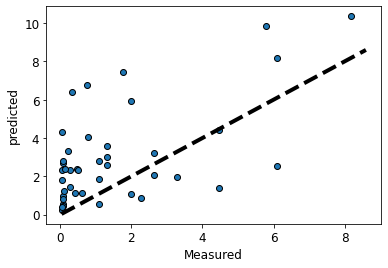

r2:  -0.6084875967745276 MAE:  2.010656537583163


In [60]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# model
mlp = MLPRegressor(random_state=7,learning_rate_init=0.01)
# train model
mlp.fit(X_train, y_train)

# visualize
mlp_pred = mlp.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, mlp_pred, edgecolors=(0,0,0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("predicted")
plt.show()

# get metrics
print("r2: ", r2_score(y_test, mlp_pred), "MAE: ", mean_absolute_error(y_test, mlp_pred))


## Voting ensemble

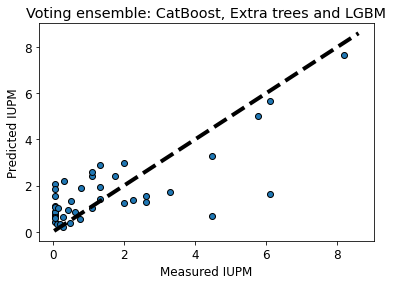

r2:  0.567085772610503 MAE:  0.9820061548362724 RMSE:  1.316076728226684


In [61]:
# Voting Ensemble for regression
from sklearn.ensemble import VotingRegressor

# create the sub models
estimators = []

model1 = CatBoostRegressor(learning_rate=0.017,verbose=0, random_state=4)
estimators.append(('Catboost', model1))

#model2 = RandomForestRegressor(random_state=12)
#estimators.append(('Random Forest', model2))

model3 = LGBMRegressor()
estimators.append(('LGBM', model3))

model4 = ExtraTreesRegressor(random_state=42)
estimators.append(('Extra trees', model4))

# create the ensemble model
ensemble = VotingRegressor(estimators)
# train ensemble model
ensemble.fit(X_train, y_train)

# visualize
ensemble_pred = ensemble.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, ensemble_pred, edgecolors=(0,0,0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured IUPM")
ax.set_ylabel("Predicted IUPM")
plt.title("Voting ensemble: CatBoost, Extra trees and LGBM")
plt.show()

# get metrics
print("r2: ", r2_score(y_test, ensemble_pred), "MAE: ", mean_absolute_error(y_test, ensemble_pred), "RMSE: ", sqrt(mean_squared_error(y_test, ensemble_pred)))


In [62]:
fig.savefig("images/ve.svg")

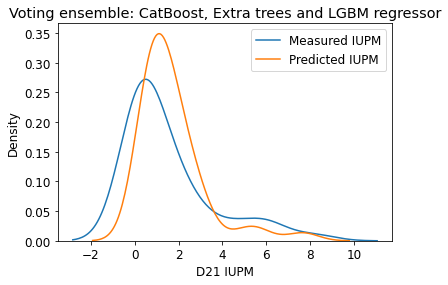

In [63]:
## plot
sns.kdeplot(y_test, label="Measured IUPM")
sns.kdeplot(ensemble_pred, label="Predicted IUPM")
plt.title("Voting ensemble: CatBoost, Extra trees and LGBM regressor")
plt.legend()
plt.savefig("images/voting_pred.svg")

## Partial Dependence
Partial dependence plot (PDP) shows the marginal effect one or two features have on the predicted outcome of a machine learning model. A partial dependence plot can show whether the relationship between the target and a feature is linear, monotonic or more complex.

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import PartialDependenceDisplay

## train a decision tree and a multi-layer perceptron on the data
Xs = df_smogn[["cd4/cd8_ratio", "Time on ART (days)","gp41","pol"]]
ys = df_smogn["D21 IUPM"]

et = ExtraTreesRegressor(random_state=6)
LGBM = LGBMRegressor()
cb = CatBoostRegressor(verbose=0)

et.fit(Xs, ys)
LGBM.fit(Xs, ys)
cb.fit(Xs, ys)

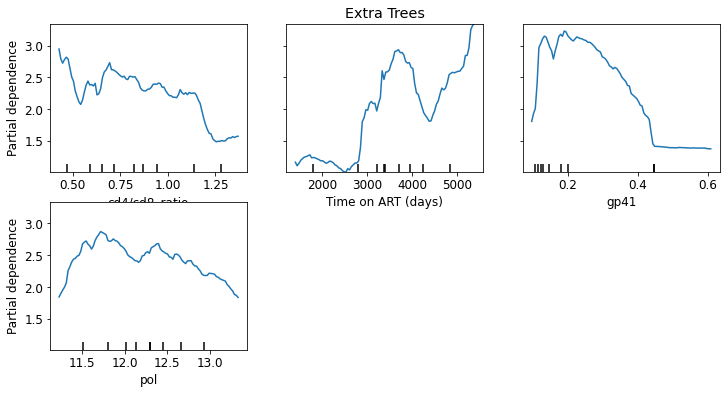

In [65]:
## plot partial dependence for extra trees
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Extra Trees")
et_disp = PartialDependenceDisplay.from_estimator(et, Xs, ["cd4/cd8_ratio", "Time on ART (days)","gp41","pol"], ax=ax)


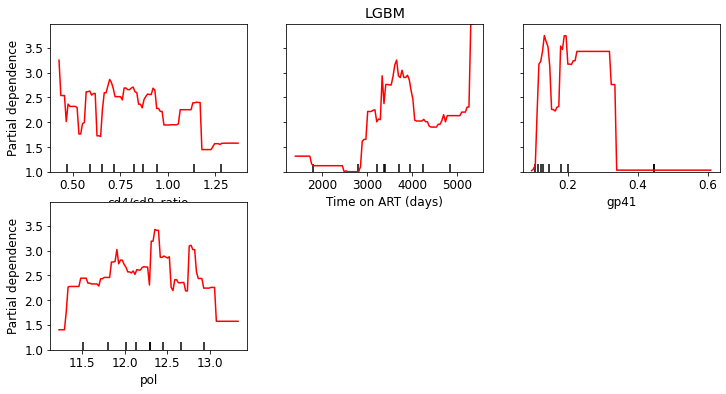

In [66]:
## plot partial dependence for LGBM
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("LGBM")
LGBM_disp = PartialDependenceDisplay.from_estimator(LGBM, Xs, ["cd4/cd8_ratio", "Time on ART (days)","gp41","pol"], ax=ax, line_kw={"color": "red"})


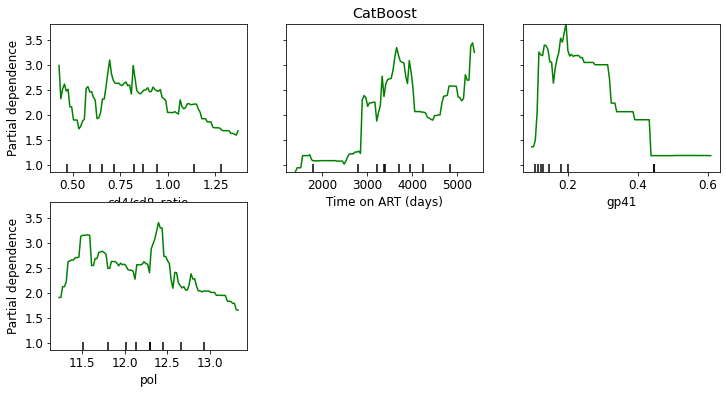

In [67]:
## plot partial dependence for catboost
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("CatBoost")
cb_disp = PartialDependenceDisplay.from_estimator(cb, Xs, ["cd4/cd8_ratio", "Time on ART (days)", "gp41", "pol"], ax=ax, line_kw={"color": "green"})

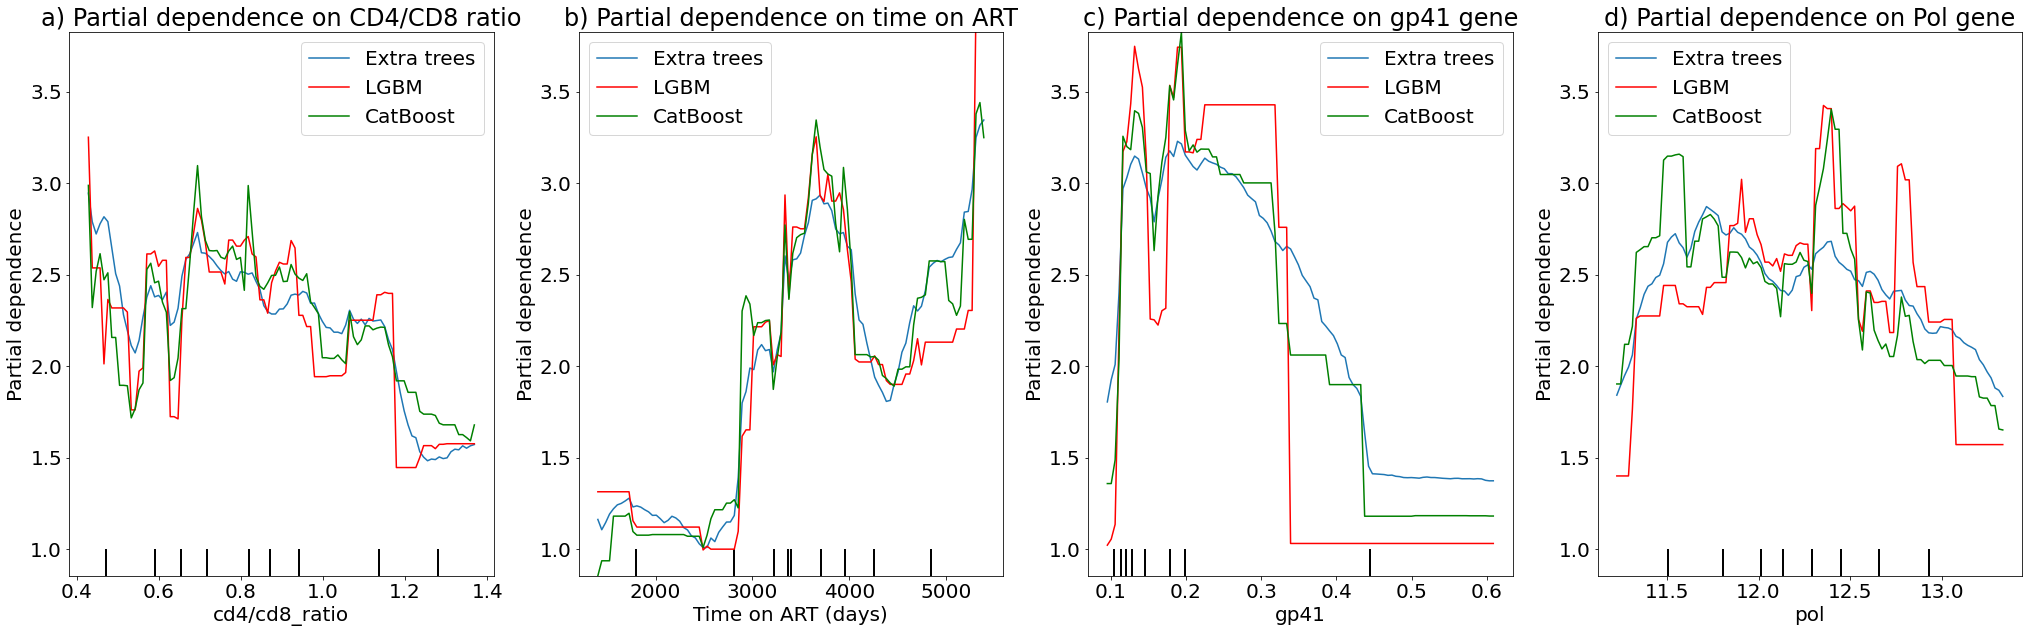

In [68]:
## compare partial dependency for the Extra trees, Random forest and CatBoost
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
fig, (ax1, ax2,ax3, ax4) = plt.subplots(1, 4, figsize=(35,10))
et_disp.plot(ax=[ax1, ax2, ax3, ax4], line_kw={"label": "Extra trees"})
LGBM_disp.plot(ax=[ax1, ax2, ax3, ax4], line_kw={"label": "LGBM", "color": "red"})
cb_disp.plot(ax=[ax1, ax2, ax3, ax4], line_kw={"label": "CatBoost", "color": "green"})
ax1.title.set_text("a) Partial dependence on CD4/CD8 ratio")
ax2.title.set_text("b) Partial dependence on time on ART")
ax3.title.set_text("c) Partial dependence on gp41 gene")
ax4.title.set_text("d) Partial dependence on Pol gene")
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

In [69]:
fig.savefig("images/Partial_dependency_2.svg")

In [70]:
#df_smogn.to_csv("df_smogn.csv", index=False)

In [71]:
### plots

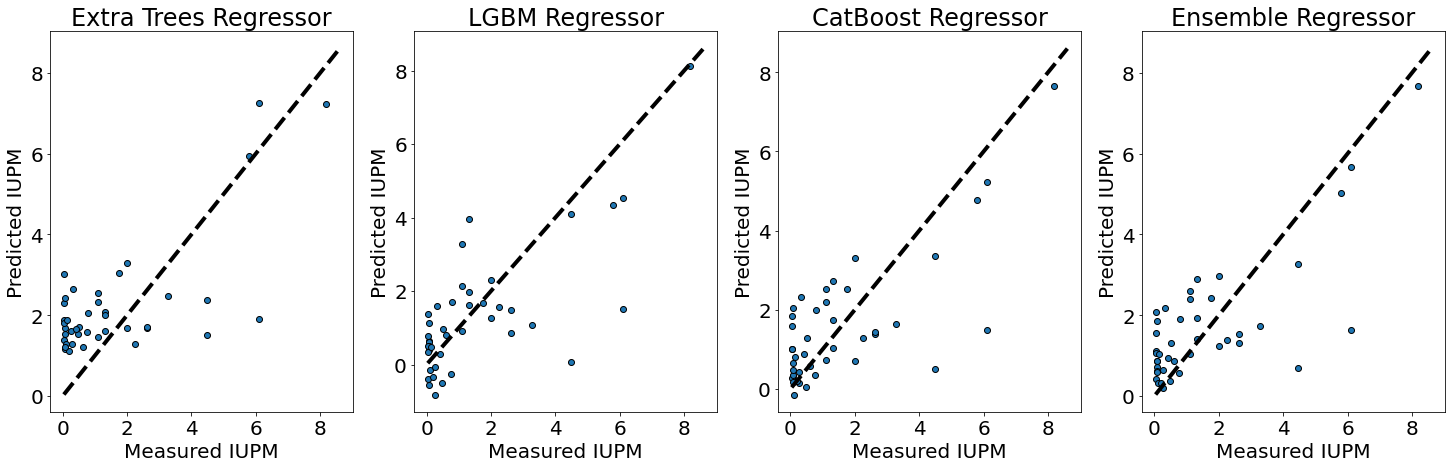

In [72]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(25,7))
ax1.scatter(y_test, et_pred, edgecolors=(0,0,0))
ax1.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax1.set_xlabel("Measured IUPM")
ax1.set_ylabel("Predicted IUPM")
ax1.title.set_text("Extra Trees Regressor")


ax2.scatter(y_test, LGBM_pred, edgecolors=(0,0,0))
ax2.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax2.set_xlabel("Measured IUPM")
ax2.set_ylabel("Predicted IUPM")
ax2.title.set_text("LGBM Regressor")


ax3.scatter(y_test, cb_pred, edgecolors=(0,0,0))
ax3.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax3.set_xlabel("Measured IUPM")
ax3.set_ylabel("Predicted IUPM")
ax3.title.set_text("CatBoost Regressor")


ax4.scatter(y_test, ensemble_pred, edgecolors=(0,0,0))
ax4.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax4.set_xlabel("Measured IUPM")
ax4.set_ylabel("Predicted IUPM")
ax4.title.set_text("Ensemble Regressor")


In [73]:
fig.savefig("images/pred.svg")

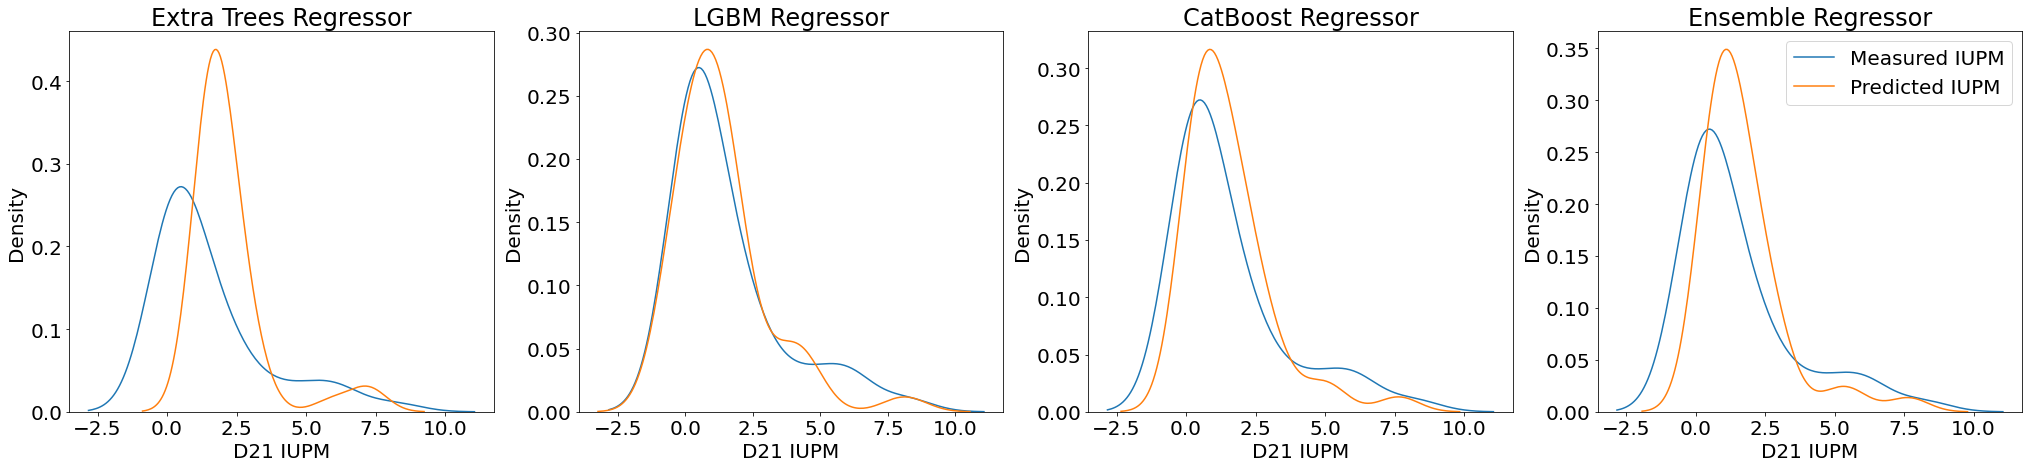

In [74]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(35,7))
sns.kdeplot(y_test, label="Measured IUPM", ax=ax1)
sns.kdeplot(et_pred, label="Predicted IUPM", ax=ax1)
ax1.title.set_text("Extra Trees Regressor")


sns.kdeplot(y_test, label="Measured IUPM", ax=ax2)
sns.kdeplot(LGBM_pred, label="Predicted IUPM", ax=ax2)
ax2.title.set_text("LGBM Regressor")


sns.kdeplot(y_test, label="Measured IUPM", ax=ax3)
sns.kdeplot(cb_pred, label="Predicted IUPM", ax=ax3)
ax3.title.set_text("CatBoost Regressor")


sns.kdeplot(y_test, label="Measured IUPM", ax=ax4)
sns.kdeplot(ensemble_pred, label="Predicted IUPM", ax=ax4)
ax4.title.set_text("Ensemble Regressor")
plt.legend()


In [75]:
fig.savefig("images/kdeplot.svg")

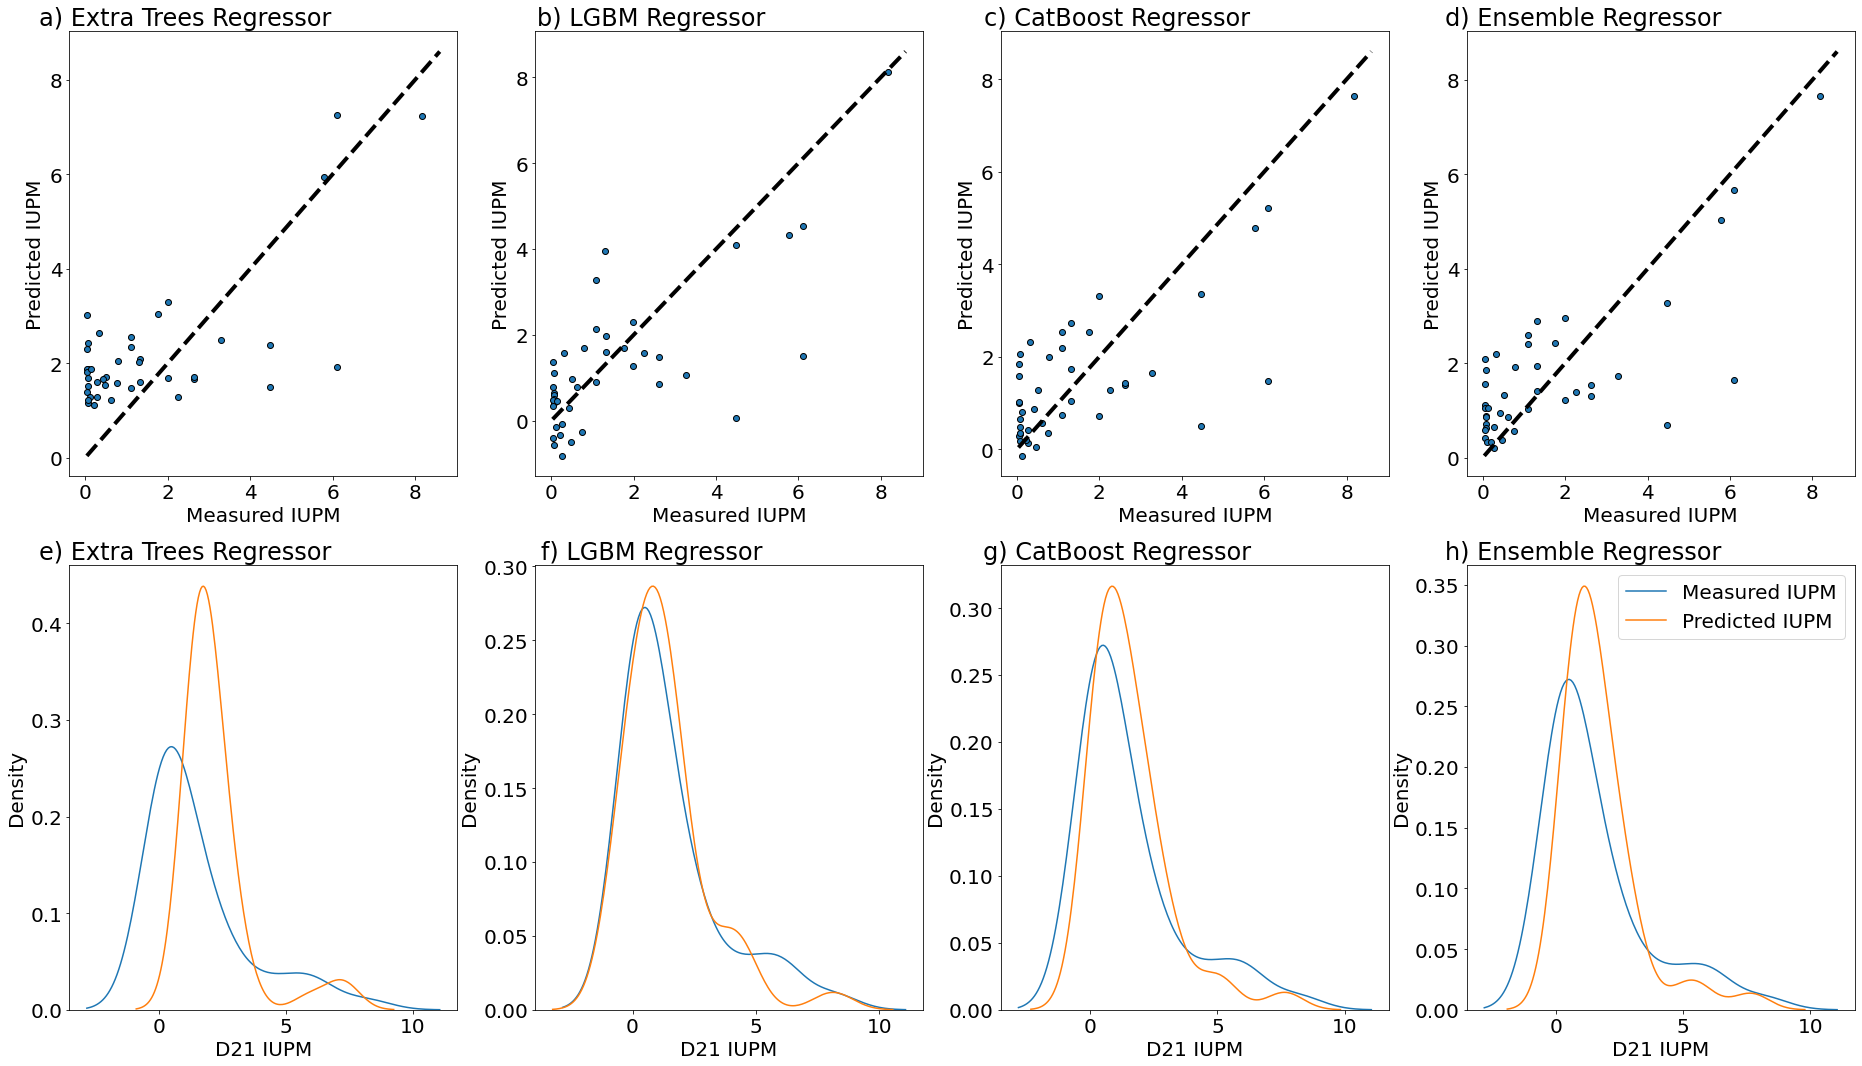

In [76]:
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4,figsize=(32,18))

ax1.title.set_position([0.3, 15])
ax1.scatter(y_test, et_pred, edgecolors=(0,0,0))
ax1.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax1.set_xlabel("Measured IUPM")
ax1.set_ylabel("Predicted IUPM")
ax1.title.set_text("a) Extra Trees Regressor")

ax2.title.set_position([0.3, 15])
ax2.scatter(y_test, LGBM_pred, edgecolors=(0,0,0))
ax2.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax2.set_xlabel("Measured IUPM")
ax2.set_ylabel("Predicted IUPM")
ax2.title.set_text("b) LGBM Regressor")

ax3.title.set_position([0.3, 15])
ax3.scatter(y_test, cb_pred, edgecolors=(0,0,0))
ax3.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax3.set_xlabel("Measured IUPM")
ax3.set_ylabel("Predicted IUPM")
ax3.title.set_text("c) CatBoost Regressor")

ax4.title.set_position([0.3, 15])
ax4.scatter(y_test, ensemble_pred, edgecolors=(0,0,0))
ax4.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax4.set_xlabel("Measured IUPM")
ax4.set_ylabel("Predicted IUPM")
ax4.title.set_text("d) Ensemble Regressor")

ax5.title.set_position([0.3, 15])
sns.kdeplot(y_test, label="Measured IUPM", ax=ax5)
sns.kdeplot(et_pred, label="Predicted IUPM", ax=ax5)
ax5.title.set_text("e) Extra Trees Regressor")

ax6.title.set_position([0.3, 15])
sns.kdeplot(y_test, label="Measured IUPM", ax=ax6)
sns.kdeplot(LGBM_pred, label="Predicted IUPM", ax=ax6)
ax6.title.set_text("f) LGBM Regressor")

ax7.title.set_position([0.3, 15])
sns.kdeplot(y_test, label="Measured IUPM", ax=ax7)
sns.kdeplot(cb_pred, label="Predicted IUPM", ax=ax7)
ax7.title.set_text("g) CatBoost Regressor")

ax8.title.set_position([0.3, 15])
sns.kdeplot(y_test, label="Measured IUPM", ax=ax8)
sns.kdeplot(ensemble_pred, label="Predicted IUPM", ax=ax8)
ax8.title.set_text("h) Ensemble Regressor")
plt.legend()


